# Setup

### Import libraries

In [1]:
%matplotlib widget

import numpy as np;
import matplotlib;
import matplotlib.pyplot as plt;
from matplotlib import rc;
import random;

from run import RUN;
from hyp import HYP;

### Test set

In [2]:
target  = [18.715208909539827, -34.17012282822991 ]

sensors = [[18.754271177776607, -34.145875144367265],
           [18.693601706134354, -34.18431654536734],
           [18.68195378429219,  -34.10115180699283]];

#xlimits = [18.680, 18.765];
#ylimits = [-34.185, -34.100];

s2n       = 100;

f_call    = 'Call0.wav';

f_sea     = ['Sea0.wav', 'Sea1.wav', 'Sea2.wav'];

no_blocks = 10000;

n = len(sensors);

### Plot parameters

In [3]:
plt.rcParams["font.family"] = "Times New Roman";
plt.rcParams["font.size"] = "10";
matplotlib.rc('figure', figsize=(8, 4));

### Test set plot

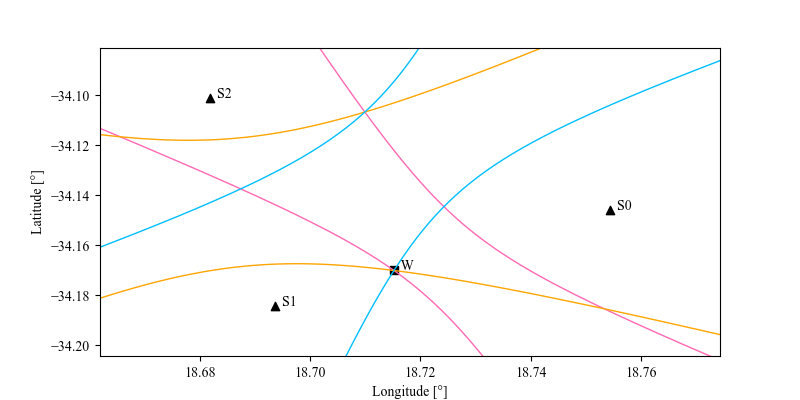

In [4]:
plt.clf();
run  = RUN(target, sensors, s2n, f_call, f_sea, no_blocks);

rmse = run.get_rmse();
dTSE = run.get_dTSE();

hyp  = HYP(sensors, target, dTSE);

hyp.plot_sensors();
hyp.plot_target();
hyp.plot_hyp();
plt.xlabel("Longitude [°]");
plt.ylabel("Latitude [°]");
plt.show();

# Run tests

### 0. Base test

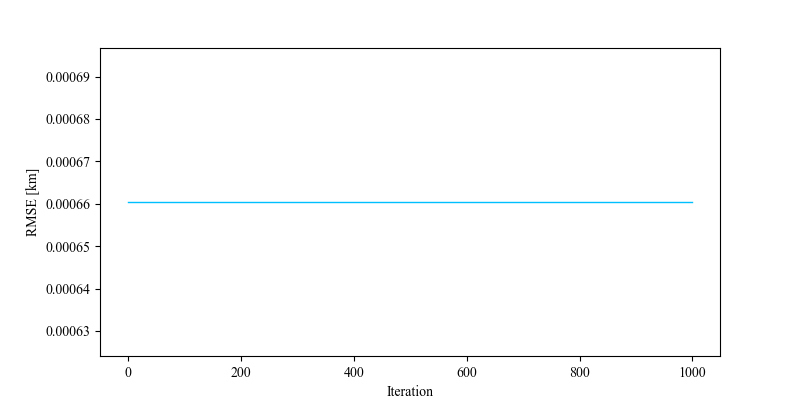

In [21]:
plt.clf();
reps0 = 1000;

rmse0 = np.zeros(reps0);

for i in range(reps0):
    run0 = RUN(target, sensors, s2n, f_call, f_sea, no_blocks);
    rmse0[i] = run0.get_rmse();
    
ave0 = np.mean(rmse0);
    
#plt.hlines(ave0, 0, reps0-1, colors="hotpink", linewidth = 0.8);    
plt.plot(rmse0, color = "deepskyblue", linewidth = 1);
plt.xlabel("Iteration");
plt.ylabel("RMSE [km]");
plt.show();

### 1. Vary coordinates

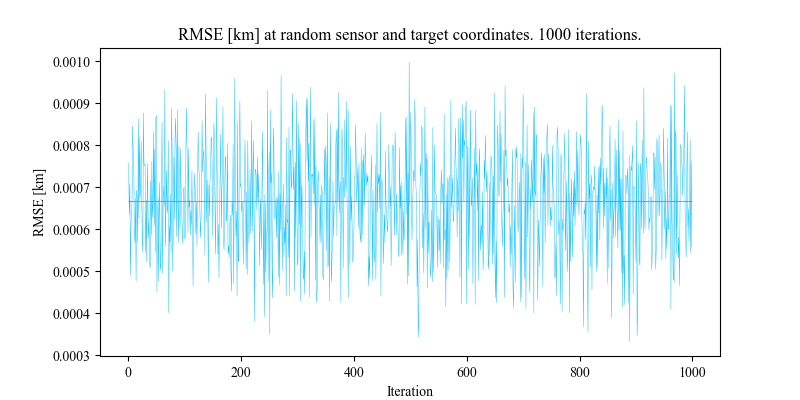

In [22]:
plt.clf();
xlimits = [18.680, 18.765];
ylimits = [-34.185, -34.100];

reps1 = 1000;
rmse1 = np.zeros(reps1);

for r in range(reps1):
    
    S1 = np.zeros((n, 2));
    for i in range(n):
        S1[i] = [random.uniform(xlimits[0], xlimits[1]), random.uniform(ylimits[0], ylimits[1])];
        
    T1 = [random.uniform(xlimits[0], xlimits[1]), random.uniform(ylimits[0], ylimits[1])];
    
    run1 = RUN(T1, S1, s2n, f_call, f_sea, no_blocks);
    rmse1[r] = run1.get_rmse();

ave1 = np.mean(rmse1);
    
plt.title("RMSE [km] at random sensor and target coordinates. " + str(reps1) + " iterations.");
plt.hlines(ave1, 0, reps1-1, colors="hotpink", linewidth = 0.8);    
plt.plot(rmse1, color = "deepskyblue", linewidth = 0.3);
plt.xlabel("Iteration");
plt.ylabel("RMSE [km]");
plt.show();

## S2N ratio
### 2.1. Vary S2N ratio

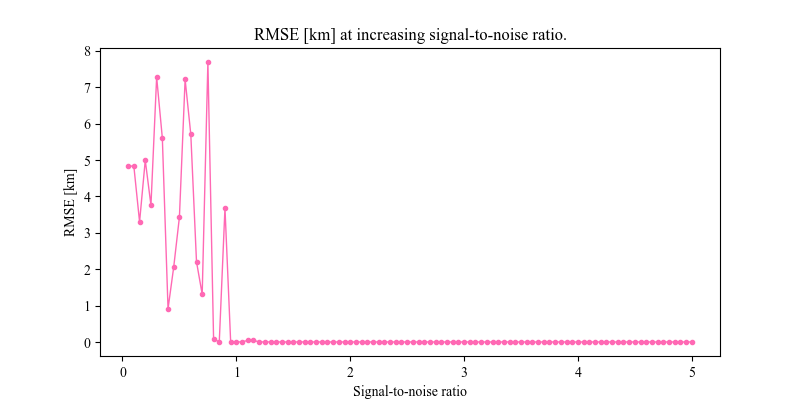

[ 0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55  0.6
  0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.    1.05  1.1   1.15  1.2
  1.25  1.3   1.35  1.4   1.45  1.5   1.55  1.6   1.65  1.7   1.75  1.8
  1.85  1.9   1.95  2.    2.05  2.1   2.15  2.2   2.25  2.3   2.35  2.4
  2.45  2.5   2.55  2.6   2.65  2.7   2.75  2.8   2.85  2.9   2.95  3.
  3.05  3.1   3.15  3.2   3.25  3.3   3.35  3.4   3.45  3.5   3.55  3.6
  3.65  3.7   3.75  3.8   3.85  3.9   3.95  4.    4.05  4.1   4.15  4.2
  4.25  4.3   4.35  4.4   4.45  4.5   4.55  4.6   4.65  4.7   4.75  4.8
  4.85  4.9   4.95  5.  ]


In [5]:
plt.clf();

reps2 = 100;
rmse2 = np.zeros(reps2);
S2N2  = np.zeros(reps2);
max_rat = 5;

i = 0;

for r in range(1, reps2+1):
    S2N2[i] = (max_rat/reps2)*r;
    run2 = RUN(target, sensors, S2N2[i], f_call, f_sea, no_blocks);
    rmse2[i] = run2.get_rmse();
    i = i+1;

plt.title("RMSE [km] at increasing signal-to-noise ratio.");
plt.plot(S2N2, rmse2, color = "hotpink", linewidth = 1, marker = '.');
plt.xlabel("Signal-to-noise ratio");
#plt.xscale('log', base=10);
plt.ylabel("RMSE [km]");
plt.show();

print(S2N2);

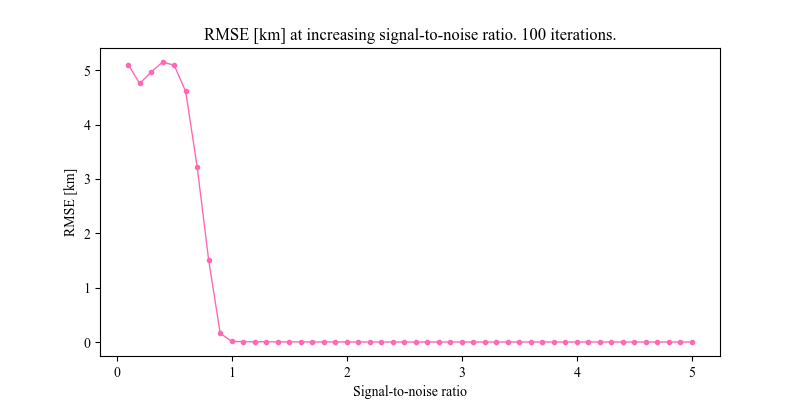

In [25]:
plt.clf();

reps2 = 100;
div2  = 50;
S2N2  = np.zeros(div2);
dbs   = np.zeros(div2);
ave2  = np.zeros(div2);
max_rat = 5;

i = 0;

for j in range(1, div2+1):
    rmse2 = np.zeros(reps2);
    S2N2[i] = (max_rat/div2)*j;
    #dbs[i] = (S2N4[i]);
    
    for r in range(reps2):
        run2 = RUN(target, sensors, S2N2[i], f_call, f_sea, no_blocks);
        rmse2[r] = run2.get_rmse();
    
    ave2[i] = np.mean(rmse2);
    i = i+1;

plt.title("RMSE [km] at increasing signal-to-noise ratio. " + str(reps2) + " iterations.");
plt.plot(S2N2, ave2, color = "hotpink", linewidth = 1, marker = '.');
plt.xlabel("Signal-to-noise ratio");
#plt.xscale('log', base=10);
plt.ylabel("RMSE [km]");
plt.show();

### 2.2. Vary S2N ratio (with iterations)

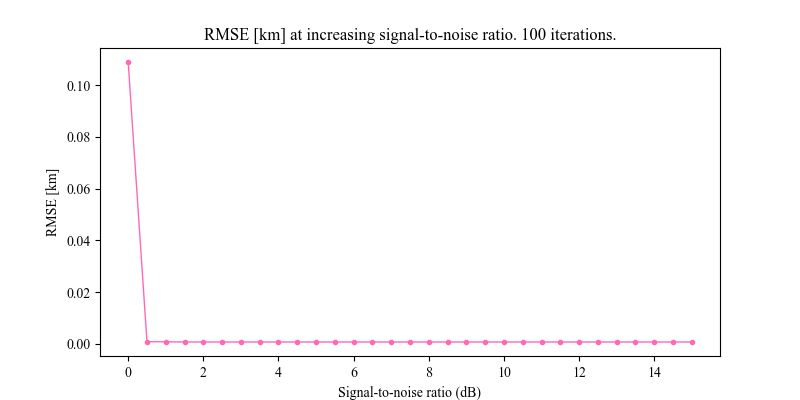

In [26]:
plt.clf();

reps4 = 100;
div4  = 31;
S2N4  = np.zeros(div4);
dbs   = np.zeros(div4);
ave4  = np.zeros(div4);
max_rat = 10;

for i in range(div4):
    rmse4 = np.zeros(reps4);
    S2N4[i] = (10**(i/2));
    dbs[i] = (i/2);
    
    #S2N4[i] = (0.1**(-i+2));
    
    for r in range(reps4):
        run4 = RUN(target, sensors, S2N4[i], f_call, f_sea, no_blocks);
        rmse4[r] = run4.get_rmse();
    
    ave4[i] = np.mean(rmse4);

plt.title("RMSE [km] at increasing signal-to-noise ratio. " + str(reps4) + " iterations.");
plt.plot(dbs, ave4, color = "hotpink", linewidth = 1, marker = '.');
plt.xlabel("Signal-to-noise ratio (dB)");
#plt.xscale('log', base=10);
plt.ylabel("RMSE [km]");
plt.show();

## Correlation window

### 3.1. Vary correlation window size

1 6.32510045579 10.0
2 1.92768397132 5.0
3 2.62204479051 3.33333333333
4 5.44592596481 2.5
5 2.05527408143 2.0
6 5.64305597458 1.66666666667
8 1.4873778559 1.25
10 0.773218041328 1.0
12 5.93759895571 0.833333333333
15 6.45955063948 0.666666666667
16 0.628649406421 0.625
20 0.419185538191 0.5
24 8.009332771 0.416666666667
25 8.03282550389 0.4
30 0.312249858436 0.333333333333
32 8.02742810554 0.3125
40 4.70334744307 0.25
48 6.46108249056 0.208333333333
50 4.57131075649 0.2
60 0.116095877858 0.166666666667
64 0.187968585206 0.15625
75 0.136797702997 0.133333333333
80 0.130109352081 0.125
96 7.77622542896 0.104166666667
100 0.159449966368 0.1
120 0.213419368747 0.0833333333333
125 8.12301717789 0.08
128 0.0612500799271 0.078125
150 0.088564449289 0.0666666666667
160 0.0993684375428 0.0625
192 0.1015096546 0.0520833333333
200 0.214689372916 0.05
240 0.0818027867882 0.0416666666667
250 0.0623409864893 0.04
256 0.0872169596094 0.0390625
300 0.0734378807873 0.0333333333333
320 0.0544789436627 

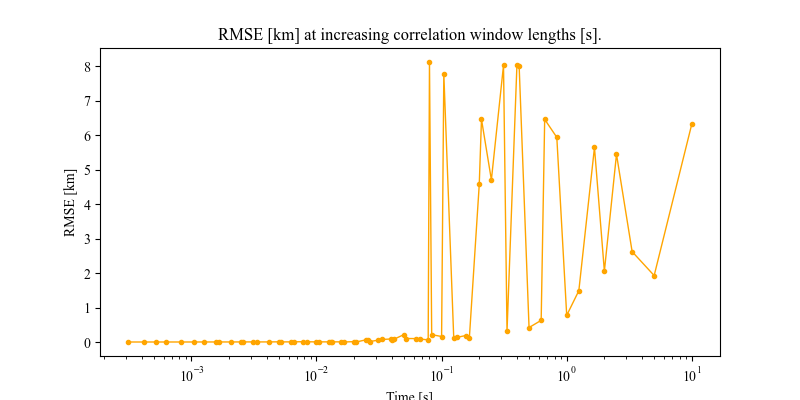

In [16]:
plt.clf();

rate = 96000;
rec_len = 10;
max_blocks = int(rate/2);
min_blocks = int(rate/rate);
block_amt = 0;

for r in range(min_blocks, max_blocks):
    if (rate%r == 0):
        block_amt = block_amt + 1;
        
rmse3 = np.zeros(block_amt);
div3 = np.zeros(block_amt);
time3 = np.zeros(block_amt);

i = 0;
        
for r in range(min_blocks, max_blocks):
    if (rate%r == 0):
        run3 = RUN(target, sensors, s2n, f_call, f_sea, r);
        rmse3[i] = run3.get_rmse();
        time3[i] = rec_len/r;
        print(r, rmse3[i], time3[i]);
        i = i+1;
        
plt.title("RMSE [km] at increasing correlation window lengths [s].");
plt.plot(time3, rmse3, color = "orange", linewidth = 1, marker = '.');
plt.xlabel("Time [s]");
plt.xscale('log', base=10);
plt.ylabel("RMSE [km]");
plt.show();

### 3.2. Vary correlation window size (with iterations)

128 0.0612500799271 0.078125
150 0.088564449289 0.0666666666667
160 0.0993684375428 0.0625
192 0.1015096546 0.0520833333333
200 0.214689372916 0.05
240 0.0818027867882 0.0416666666667
250 0.0623409864893 0.04
256 0.0872169596094 0.0390625
300 0.0734378807873 0.0333333333333
320 0.0544789436627 0.03125
375 0.0137355362976 0.0266666666667
384 0.0490206447203 0.0260416666667
400 0.0647258100089 0.025
480 0.00191339638371 0.0208333333333
500 0.0104596343021 0.02
600 0.000983465795892 0.0166666666667
640 0.00452191284586 0.015625
750 0.00383079415881 0.0133333333333
768 0.00592287453778 0.0130208333333
800 0.00391293122378 0.0125
960 0.00404165126398 0.0104166666667
1000 0.00318770601093 0.01
1200 0.00667883011764 0.00833333333333
1280 0.00828486953344 0.0078125
1500 0.00554457359222 0.00666666666667
1600 0.00391293122378 0.00625
1920 0.00300408108337 0.00520833333333
2000 0.00538351421926 0.005
2400 0.00251479929656 0.00416666666667
3000 0.00205210787466 0.00333333333333
3200 0.00282144781

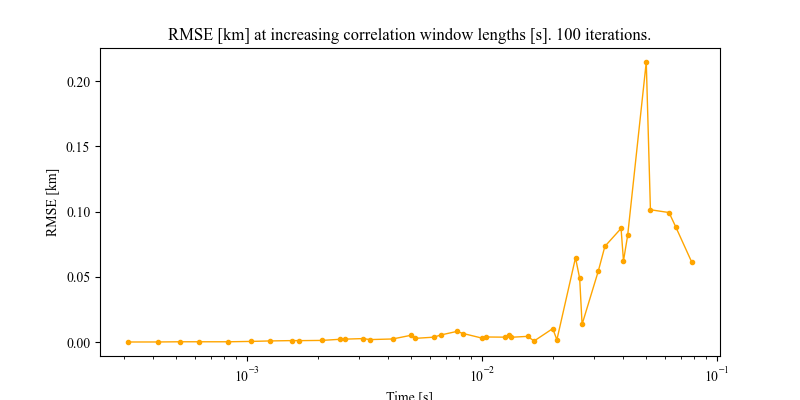

In [13]:
plt.clf();

rate = 96000;
rec_len = 10;
max_blocks = int(rate/2);
min_blocks = int(rate/750);
block_amt = 0;

reps3 = 100;

for r in range(min_blocks, max_blocks):
    if (rate%r == 0):
        block_amt = block_amt + 1;
        
div3 = np.zeros(block_amt);
time3 = np.zeros(block_amt);
ave3 = np.zeros(block_amt);

j = 0;

for i in range(min_blocks, max_blocks):
    if (rate%i == 0):
        rmse3 = np.zeros(reps3);
    
        for r in range(reps3):
            run3 = RUN(target, sensors, s2n, f_call, f_sea, i);
            rmse3[r] = run3.get_rmse();
    
        time3[j] = rec_len/i;
        ave3[j] = np.mean(rmse3);
        
        print(i, ave3[j], time3[j]);
        j = j+1;

plt.title("RMSE [km] at increasing correlation window lengths [s]. " + str(reps3) + " iterations.");
plt.plot(time3, ave3, color = "orange", linewidth = 1, marker = '.');
plt.xlabel("Time [s]");
plt.xscale('log', base=10);
plt.ylabel("RMSE [km]");
plt.show();